<a href="https://colab.research.google.com/github/mohamedHashem250/DeepLearningArchitecture/blob/main/PreTrainedModels/ResNet/ResNet_TransferLearning_FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/code/cokastefan/keras-resnet-50/notebook
#https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

#good article:::https://medium.com/swlh/resnet-with-tensorflow-transfer-learning-13ff0773cf0c


In [1]:
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
#! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle_token/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/kaggle/kaggle.json
#download the dataset:
#kaggle link: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
!kaggle datasets download -d alxmamaev/flowers-recognition
#then unzip this data
!unzip flowers-recognition.zip
#ther five floders:

Mounted at /content/drive
cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 97% 219M/225M [00:01<00:00, 201MB/s]
100% 225M/225M [00:01<00:00, 222MB/s]
Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8b

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
#import cv2

In [3]:
#pepare the dataset and loaded it using ImageDataGererator:
image_size = 150
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0 / 255, #Normalize pixel between 0 to 1
    validation_split = 0.2, # resrve 20% of data for validation
    horizontal_flip = True,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    rotation_range = 20,
    zoom_range = 0.3

)
#set train_generator :
train_generator = data_generator.flow_from_directory(
    directory = '/content/flowers',
    target_size = (image_size , image_size),
    batch_size = batch_size,
    subset = 'training',  #use the 'training' Subset
    class_mode = 'categorical'
)
#Validation generator:
validation_generator = data_generator.flow_from_directory(
    directory = '/content/flowers',
    target_size = (image_size , image_size),
    batch_size = batch_size,
    subset = 'validation',  #use the 'validation' Subset
    class_mode = 'categorical'
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [6]:
train_generator.n

3457

In [7]:
train_generator.batch_size

32

In [8]:
len(train_generator)

109

In [11]:
steps_per_epoch = math.ceil(train_generator.n / train_generator.batch_size)
steps_per_epoch

109

In [10]:
import math

steps_per_epoch = math.ceil(train_generator.n / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.n / validation_generator.batch_size)


In [4]:
#import PreTrained ResNet Model:
#base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
model = tf.keras.Sequential()
model.add(tf.keras.applications.ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation = 'softmax'))
model.layers[0].trainable = False #for CNN part
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
history = model.fit(
    train_generator,
    #steps_per_epoch =len(train_generator),
    epochs = 100,
    validation_data  = validation_generator,
    #validation_steps = len(validation_generator),
    verbose = 1,
)

Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 307ms/step - accuracy: 0.2951 - loss: 1.5682 - val_accuracy: 0.3244 - val_loss: 1.5508
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 45s 350ms/step - accuracy: 0.2909 - loss: 1.5641 - val_accuracy: 0.3465 - val_loss: 1.5372
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 36s 301ms/step - accuracy: 0.2965 - loss: 1.5590 - val_accuracy: 0.3535 - val_loss: 1.5268
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - accuracy: 0.3129 - loss: 1.5503 - val_accuracy: 0.3407 - val_loss: 1.5200
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 38s 340ms/step - accuracy: 0.3159 - loss: 1.5400 - val_accuracy: 0.3651 - val_loss: 1.5202
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 43s 358ms/step - accuracy: 0.3359 - loss: 1.5394 - val_accuracy: 0.3209 - val_loss: 1.5202
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 303ms/step - accuracy: 0.3126 - loss: 1.5431 - val_accuracy: 0.3512 - val_loss: 1.5104
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - accuracy: 0.3113 -

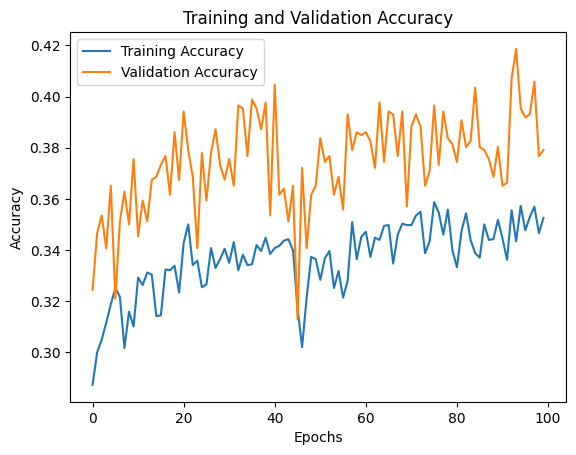

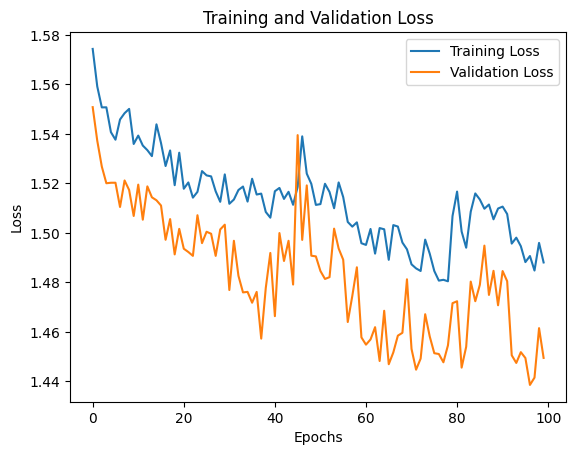

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [9]:
import os, random
#from tensorflow.python.keras.preprocessing.image import load_img, img_to_array # This line is causing the issue
from tensorflow.keras.utils import load_img, img_to_array # Import from keras.preprocessing.image instead
from tensorflow.keras.applications.resnet50 import preprocess_input
from IPython.display import Image, display
import numpy as np

In [10]:

img_locations = []
labels = []
img_locations = []
labels = []
for d in os.listdir('/content/flowers/'):#d here for each loop is the class floder
  directory = os.path.join('/content/flowers/',d)
  sample_size = int(random.random()*10)
  img_locations += [os.path.join(directory, img_name) for img_name in
                                    random.sample(os.listdir(directory) , sample_size)]
  labels += [d]*sample_size


In [11]:
img_locations

['/content/flowers/sunflower/9738792160_00cbcc99c8_n.jpg',
 '/content/flowers/sunflower/15118243470_7e0a7f159c_n.jpg',
 '/content/flowers/sunflower/24459750_eb49f6e4cb_m.jpg',
 '/content/flowers/sunflower/20972862281_5367f4af88.jpg',
 '/content/flowers/sunflower/4846786944_2832c5c8b8.jpg',
 '/content/flowers/sunflower/28664252816_1f24388ee6_n.jpg',
 '/content/flowers/sunflower/4755075329_1fccc69d4e.jpg',
 '/content/flowers/sunflower/200011914_93f57ed68b.jpg',
 '/content/flowers/rose/4061451210_1650590c6a.jpg',
 '/content/flowers/rose/12238827553_cf427bfd51_n.jpg',
 '/content/flowers/tulip/14084211971_0f921f11fe_n.jpg',
 '/content/flowers/tulip/7094415739_6b29e5215c_m.jpg',
 '/content/flowers/tulip/15049902081_dd85361f8c_m.jpg',
 '/content/flowers/tulip/8511683706_4173683d45_m.jpg',
 '/content/flowers/tulip/17706953166_cc21734d26_n.jpg',
 '/content/flowers/tulip/7145978709_2d1596f462.jpg',
 '/content/flowers/tulip/7082608511_f4cf233f59_n.jpg',
 '/content/flowers/tulip/7166550328_de0d73c

In [12]:
labels

['sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'rose',
 'rose',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'tulip',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'daisy',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion',
 'dandelion']

In [13]:


# def read_prepare_imgs(img_paths,img_height, img_width ):
#   imgs = [cv2.imread(img_path) for img_path in img_paths]
#   imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imgs]
#   imgs = [cv2.resize(img, (img_height, img_width)) for img in imgs]
#   imgs = [img/255.0 for img in imgs]
#   return imgs

def read_prepare_imgs(img_paths,img_height, img_width ):
  imgs = [load_img(img_path, target_size = (img_height, img_width)) for img_path in img_paths]
  imgs = [img_to_array(img) for img in imgs]
  return preprocess_input(np.array(imgs))


In [14]:
#shuffling the paths and labels:
c = list(zip(img_locations, labels))
random.shuffle(c)
img_locations, labels = zip(*c)
imgs = read_prepare_imgs(img_locations, 150, 150)
#predicted_labels = model.predict(imgs)
classes = dict((v,k) for k,v in train_generator.class_indices.items())

In [15]:
classes

{0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


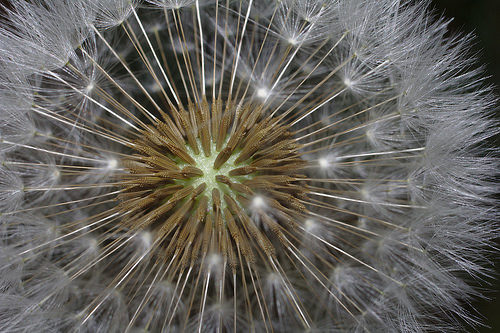

Actual class:  dandelion
Predicted class:  daisy


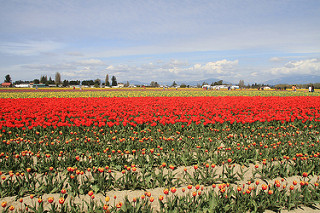

Actual class:  tulip
Predicted class:  daisy


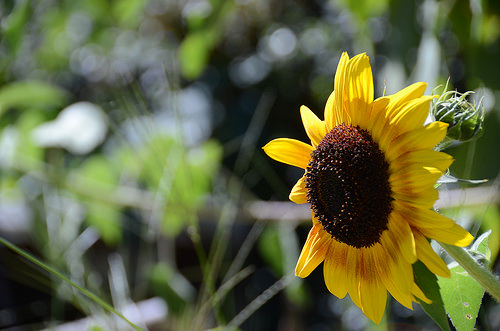

Actual class:  sunflower
Predicted class:  tulip


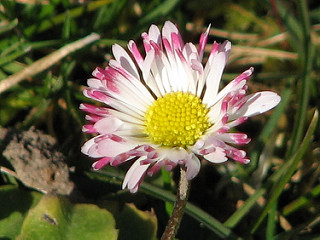

Actual class:  daisy
Predicted class:  tulip


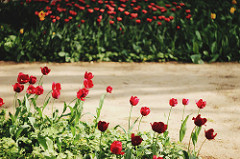

Actual class:  tulip
Predicted class:  tulip


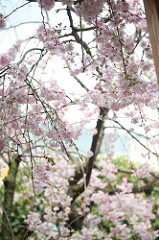

Actual class:  tulip
Predicted class:  tulip


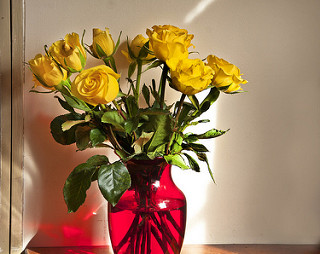

Actual class:  rose
Predicted class:  tulip


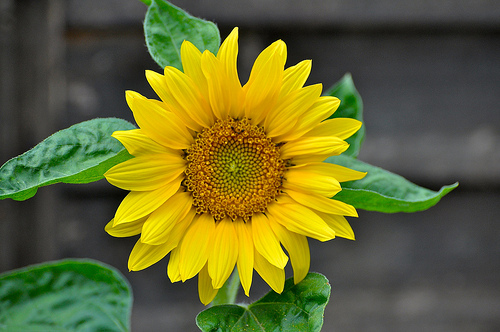

Actual class:  sunflower
Predicted class:  tulip


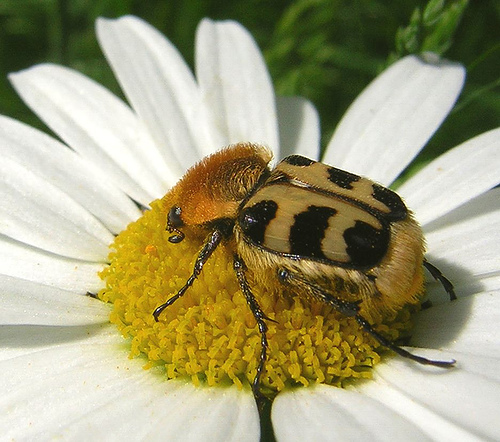

Actual class:  daisy
Predicted class:  daisy


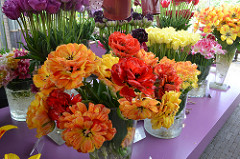

Actual class:  tulip
Predicted class:  tulip


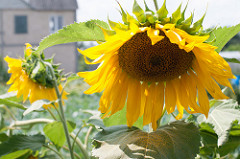

Actual class:  sunflower
Predicted class:  daisy


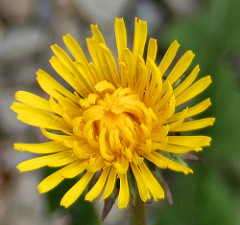

Actual class:  dandelion
Predicted class:  tulip


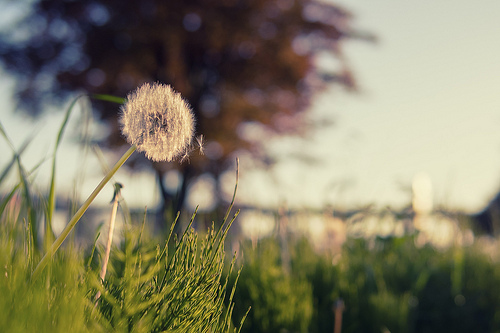

Actual class:  dandelion
Predicted class:  tulip


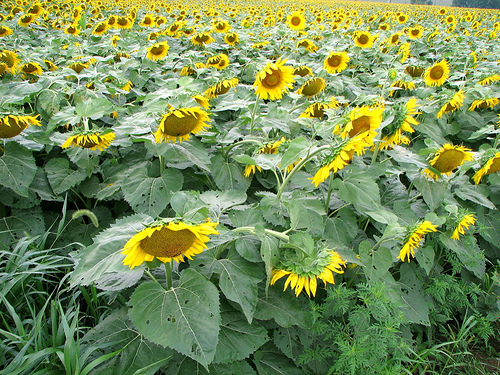

Actual class:  sunflower
Predicted class:  tulip


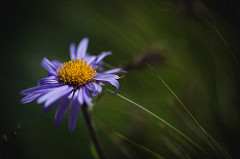

Actual class:  daisy
Predicted class:  tulip


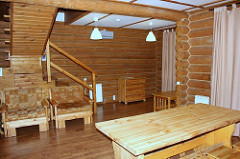

Actual class:  sunflower
Predicted class:  tulip


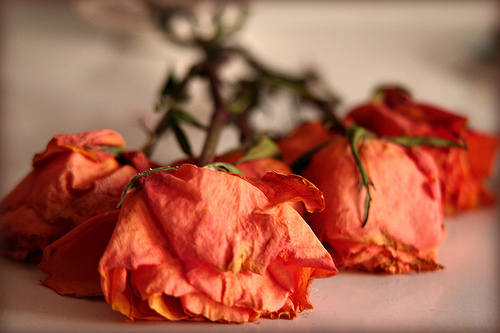

Actual class:  rose
Predicted class:  tulip


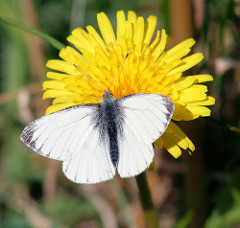

Actual class:  dandelion
Predicted class:  tulip


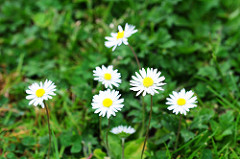

Actual class:  daisy
Predicted class:  tulip


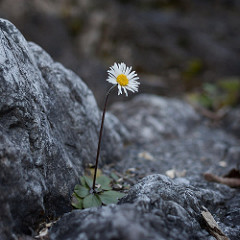

Actual class:  daisy
Predicted class:  tulip


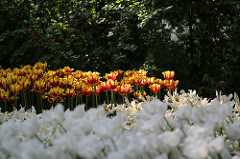

Actual class:  tulip
Predicted class:  tulip


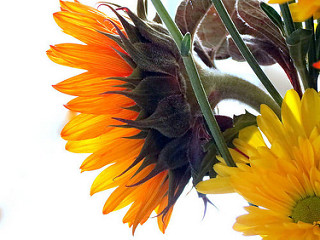

Actual class:  sunflower
Predicted class:  tulip


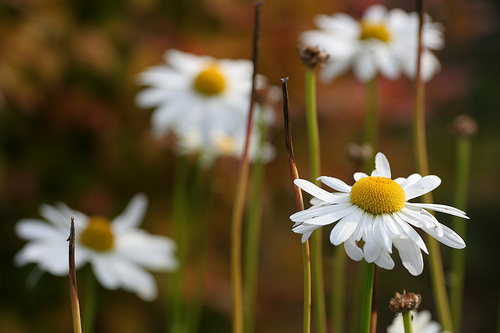

Actual class:  daisy
Predicted class:  tulip


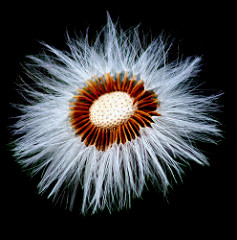

Actual class:  dandelion
Predicted class:  daisy


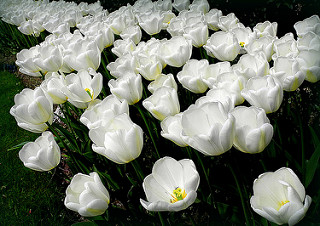

Actual class:  tulip
Predicted class:  daisy


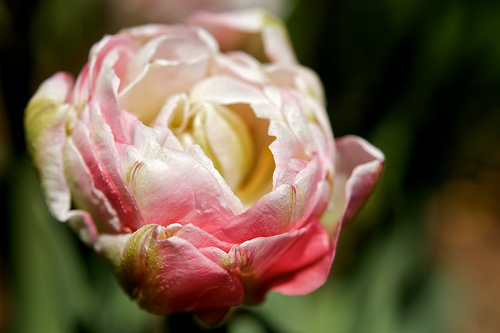

Actual class:  tulip
Predicted class:  daisy


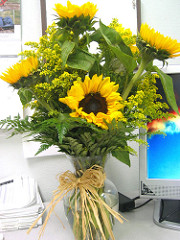

Actual class:  sunflower
Predicted class:  tulip


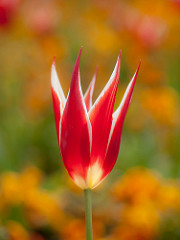

Actual class:  tulip
Predicted class:  tulip


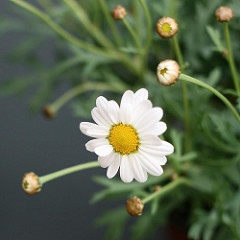

Actual class:  daisy
Predicted class:  tulip


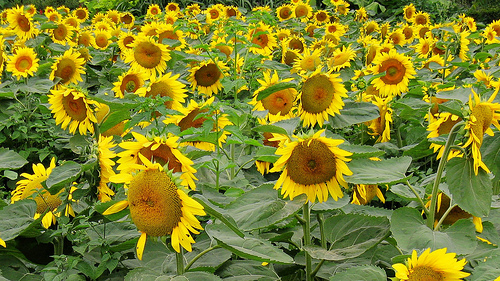

Actual class:  sunflower
Predicted class:  tulip


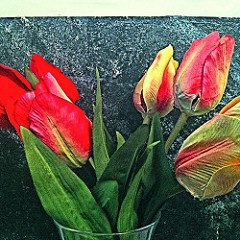

Actual class:  tulip
Predicted class:  tulip


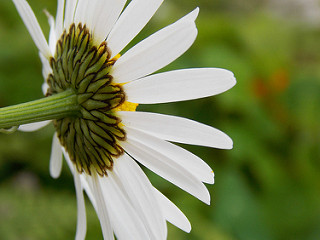

Actual class:  daisy
Predicted class:  tulip


In [16]:
predicted_labels = model.predict(imgs)


#display imgs with true classs and predicted class
for img_path ,actual, prediction in zip(img_locations, labels, predicted_labels):
  display(Image(img_path))
  print("Actual class: ", actual)
  print("Predicted class: ", classes[np.argmax(prediction)])

In [ ]:
#############it's very bad classifier, we can use another architecture in next time recommended architecture :
#ResNet50
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(num_classes, activation='softmax'))
